In [1]:
import pandas as pd
import numpy as np

# ให้แสดงทุกคอลัมน์เวลา df.head()
pd.set_option("display.max_columns", None)

### 4.1 Quick sanity check

In [2]:
# Data Loading & Schema Enforcement
file_path = "Global_Superstore_Cleaned.csv"
df = pd.read_csv(
    file_path,
    parse_dates=["Order Date", "Ship Date", "Order_YM"]
)

# ดูขนาดข้อมูล
print("Shape:", df.shape)

# ดู 5 แถวแรก
display(df.head())

Shape: (51290, 30)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year,Order_Month,Order_Quarter,Order_YM,ShipDays,ProfitMargin
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,2012-07,3,2012-07-01,0,0.330000
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2013-02,1,2013-02-01,2,-0.077847
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,2013-10,4,2013-10-01,1,0.177766
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,2013-01,1,2013-01-01,2,-0.033376
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,2013-11,4,2013-11-01,1,0.109963


In [3]:
# ดูประเภทข้อมูลแต่ละคอลัมน์
schema = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Dtype": df.dtypes.values
})

schema

,Column,Non-Null Count,Dtype
0,Row ID,51290,int64
1,Order ID,51290,object
2,Order Date,51290,datetime64[ns]
3,Ship Date,51290,datetime64[ns]
4,Ship Mode,51290,object
5,Customer ID,51290,object
6,Customer Name,51290,object
7,Segment,51290,object
8,City,51290,object
9,State,51290,object


### 4.2 KPI Summary

##### 4.2.1 Total Sales, Profit, Quantity

In [7]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_quantity = df["Quantity"].sum()

print("Total Sales: ${:,.2f}".format(total_sales))
print("Total Profit: ${:,.2f}".format(total_profit))
print("Total Quantity Sold:", total_quantity)

Total Sales: $12,642,501.91
Total Profit: $1,467,457.29
Total Quantity Sold: 178312


#### 4.2.2 Overall Profit Margin

In [8]:
overall_profit_margin = total_profit / total_sales
print("Overall Profit Margin: {:.2%}".format(overall_profit_margin))

Overall Profit Margin: 11.61%


#### 4.2.3 Number of Orders

In [9]:
num_orders = df["Order ID"].nunique()
print("Number of Unique Orders:", num_orders)

Number of Unique Orders: 25035


#### 4.2.4 Number of Customers

In [10]:
num_customers = df["Customer ID"].nunique()
print("Number of Unique Customers:", num_customers)

Number of Unique Customers: 1590


#### 4.2.5 KPIs Overview

In [13]:
kpi_summary = pd.DataFrame({
    "Metric": [
        "Total Sales",
        "Total Profit",
        "Total Quantity Sold",
        "Overall Profit Margin",
        "Number of Orders",
        "Number of Customers"
    ],
    "Value": [
        total_sales,
        total_profit,
        total_quantity,
        overall_profit_margin,
        num_orders,
        num_customers
    ]
})

kpi_summary

,Metric,Value
0,Total Sales,1.264250e+07
1,Total Profit,1.467457e+06
2,Total Quantity Sold,1.783120e+05
3,Overall Profit Margin,1.160733e-01
4,Number of Orders,2.503500e+04
5,Number of Customers,1.590000e+03


In [17]:
kpi_summary_display = kpi_summary.copy()

def format_kpi(row):
    metric = row["Metric"]
    value = row["Value"]

    if metric in ["Total Sales", "Total Profit"]:
        return f"{value:,.2f}"

    elif metric == "Total Quantity Sold":
        return f"{int(value):,}"

    elif metric in ["Number of Orders", "Number of Customers"]:
        return f"{int(value):,}"

    elif metric == "Overall Profit Margin":
        return f"{value:.2%}"

    else:
        return value

kpi_summary_display["Value"] = kpi_summary_display.apply(format_kpi, axis=1)

kpi_summary_display


,Metric,Value
0,Total Sales,"12,642,501.91"
1,Total Profit,"1,467,457.29"
2,Total Quantity Sold,"178,312"
3,Overall Profit Margin,11.61%
4,Number of Orders,"25,035"
5,Number of Customers,"1,590"


จากการคำนวณ KPI ภาพรวม พบว่าธุรกิจมีปริมาณยอดขายรวมในระดับสูง และสามารถสร้างกำไรสุทธิได้ในภาพรวม โดยมีอัตรากำไร (Overall Profit Margin) อยู่ในระดับที่สมเหตุสมผลสำหรับธุรกิจค้าปลีก ข้อมูลแสดงให้เห็นว่ารายได้ส่วนใหญ่มาจากจำนวนคำสั่งซื้อจำนวนมากจากลูกค้าหลายราย ซึ่งเหมาะสำหรับการวิเคราะห์เชิงลึกในขั้นตอนถัดไป เช่น การวิเคราะห์ตามช่วงเวลา สินค้า และกลุ่มลูกค้า

### 4.3 Time-Series Analysis

#### 4.3.1 ตรวจสอบช่วงเวลาของข้อมูล (Time Coverage)

In [22]:
df['Order_YM'].min(), df['Order_YM'].max()
print("Dataset covers sales transactions from {} to {}.".format(df['Order_YM'].min(), df['Order_YM'].max()))

Dataset covers sales transactions from 2011-01-01 00:00:00 to 2014-12-01 00:00:00.


#### 4.3.2 สร้าง Monthly Aggregation (Core Time-Series Table)

In [23]:
monthly_ts = (
    df.groupby("Order_YM")
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum"),
          Orders=("Order ID", "nunique"),
          Quantity=("Quantity", "sum")
      )
      .reset_index()
)

monthly_ts.head()

,Order_YM,Sales,Profit,Orders,Quantity
0,2011-01-01,98898.48886,8321.80096,216,1463
1,2011-02-01,91152.15698,12417.90698,183,1224
2,2011-03-01,145729.36736,15303.56826,277,1836
3,2011-04-01,116915.76418,12902.32438,267,2020
4,2011-05-01,146747.83610,12183.82870,295,2013


#### 4.3.3 Monthly Sales Trend

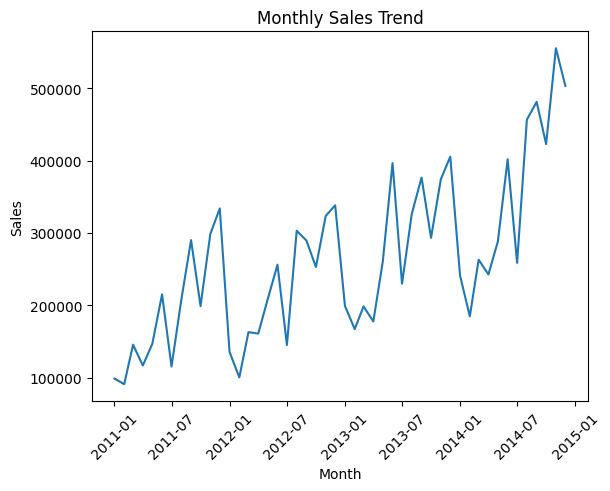

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_ts["Order_YM"], monthly_ts["Sales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.show()

Monthly sales show a clear upward trend with recurring peaks, indicating both long-term growth and seasonal demand.

#### 4.3.4 Monthly Profit Trend

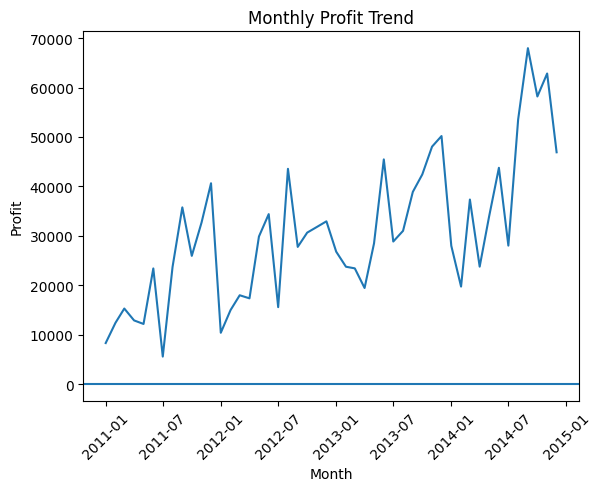

In [46]:
plt.figure()
plt.plot(monthly_ts["Order_YM"], monthly_ts["Profit"])
plt.axhline(0)
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Profit")
plt.show()

Profit is more volatile than sales, suggesting sensitivity to discounts and shipping costs.

#### 4.3.5 Order Volume Over Time

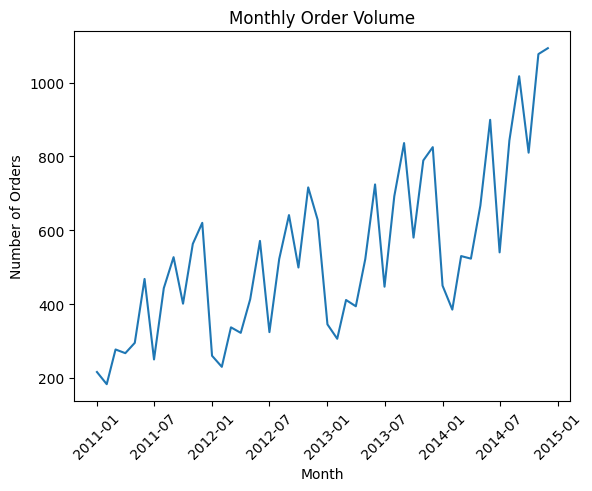

In [45]:
plt.figure()
plt.plot(monthly_ts["Order_YM"], monthly_ts["Orders"])
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Orders")
plt.show()

#### 4.3.6 Average Order Value (AOV)

In [28]:
monthly_ts["AOV"] = monthly_ts["Sales"] / monthly_ts["Orders"]

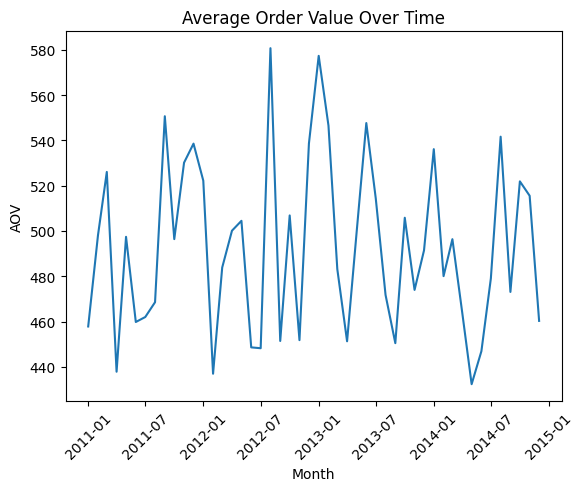

In [44]:
plt.figure()
plt.plot(monthly_ts["Order_YM"], monthly_ts["AOV"])
plt.title("Average Order Value Over Time")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("AOV")
plt.show()

Business growth is driven mainly by increased order volume rather than higher spending per order.

#### 4.3.7 Year-over-Year (YoY) Sales Growth

In [30]:
monthly_ts["Sales_YoY_%"] = (
    monthly_ts["Sales"]
    .pct_change(periods=12) * 100
)

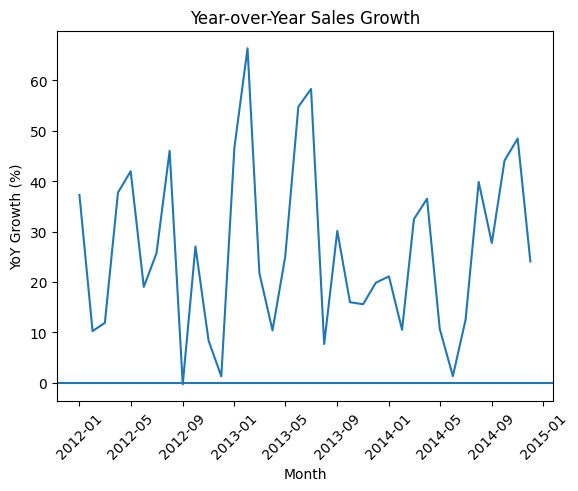

In [43]:
plt.figure()
plt.plot(monthly_ts["Order_YM"], monthly_ts["Sales_YoY_%"])
plt.axhline(0)
plt.title("Year-over-Year Sales Growth")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("YoY Growth (%)")
plt.show()

#### 4.3.8 Seasonality by Month (Across Years)

In [32]:
seasonality = (
    df.groupby("Order_Month")
      .agg(Sales=("Sales", "sum"))
      .reset_index()
)

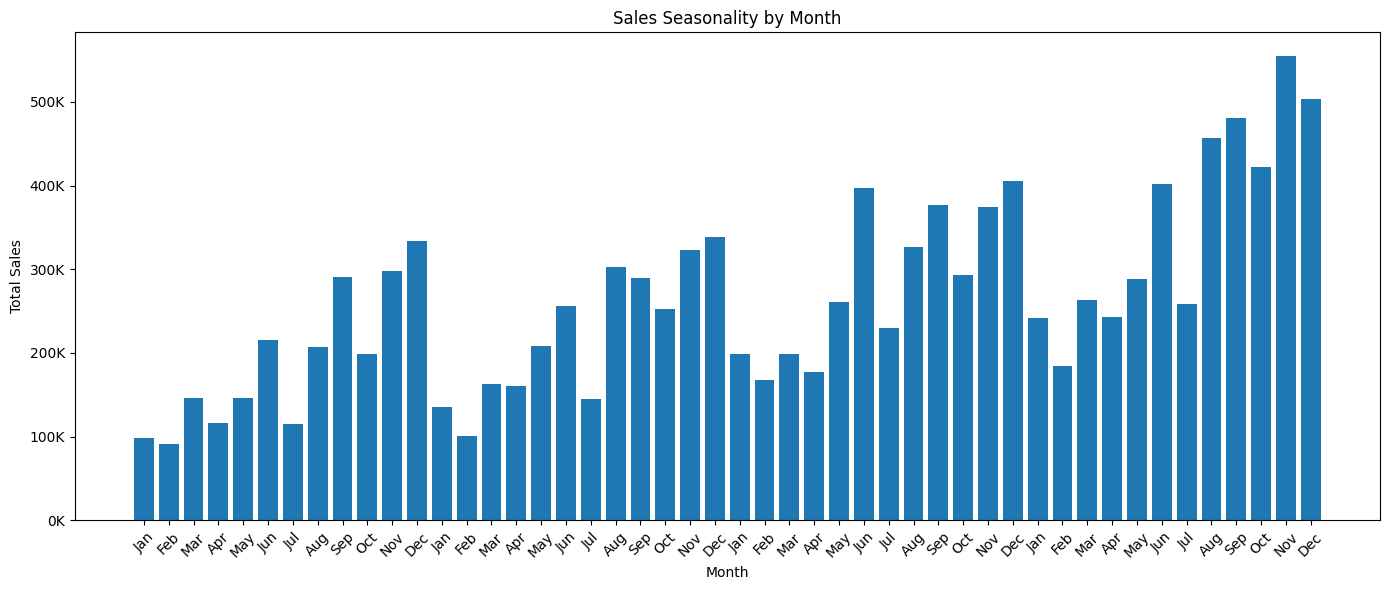

In [57]:
plt.figure(figsize=(14, 6))
plt.bar(seasonality["Order_Month"], seasonality["Sales"], width=0.8)

plt.title("Sales Seasonality by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")

plt.xticks(
    ticks=seasonality["Order_Month"],
    labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",
            "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",
            "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",
            "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov", "Dec"],
    rotation=45
)

plt.gca().yaxis.set_major_formatter(
    lambda x, _: f"{int(x/1000)}K"
)

plt.tight_layout()
plt.show()


Sales consistently peak in Q4 (November–December), confirming strong seasonal effects.

#### 4.3.9 Moving Average (Trend Smoothing)

In [34]:
monthly_ts["Sales_MA_3"] = monthly_ts["Sales"].rolling(3).mean()
monthly_ts["Sales_MA_6"] = monthly_ts["Sales"].rolling(6).mean()

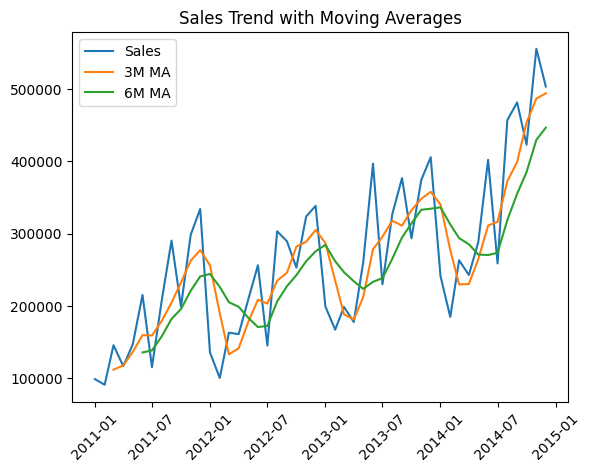

In [48]:
plt.figure()
plt.plot(monthly_ts["Order_YM"], monthly_ts["Sales"], label="Sales")
plt.plot(monthly_ts["Order_YM"], monthly_ts["Sales_MA_3"], label="3M MA")
plt.plot(monthly_ts["Order_YM"], monthly_ts["Sales_MA_6"], label="6M MA")
plt.legend()
plt.title("Sales Trend with Moving Averages")
plt.xticks(rotation=45)
plt.show()

### 4.4 Product-Level Exploration

##### 4.4.1 Sales & Profit by Category

In [66]:
category_perf = (
    df.groupby("Category")
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum"),
          Orders=("Order ID", "nunique"),
          Quantity=("Quantity", "sum")
      )
      .reset_index()
)

category_perf_display = category_perf.copy()

category_perf_display["Sales (M)"] = (category_perf_display["Sales"] / 1_000_000).round(2)
category_perf_display["Profit (M)"] = (category_perf_display["Profit"] / 1_000_000).round(2)

category_perf_display[["Category", "Sales (M)", "Profit (M)", "Orders", "Quantity"]]

,Category,Sales (M),Profit (M),Orders,Quantity
0,Furniture,4.11,0.29,8195,34954
1,Office Supplies,3.79,0.52,19003,108182
2,Technology,4.74,0.66,8354,35176


##### Visualization: Sales by Category

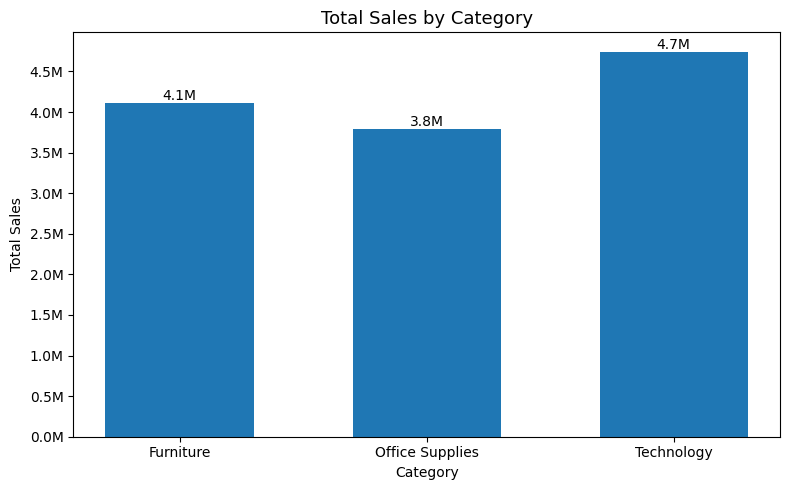

In [82]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(
    category_perf["Category"],
    category_perf["Sales"],
    width=0.6
)

plt.title("Total Sales by Category", fontsize=13)
plt.xlabel("Category")
plt.ylabel("Total Sales")

ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(500_000))
ax.yaxis.set_major_formatter(lambda y, _: f"{y/1_000_000:.1f}M")

for i, value in enumerate(category_perf["Sales"]):
    plt.text(
        i,
        value,
        f"{value/1_000_000:.1f}M",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


##### Visualization: Profit by Category

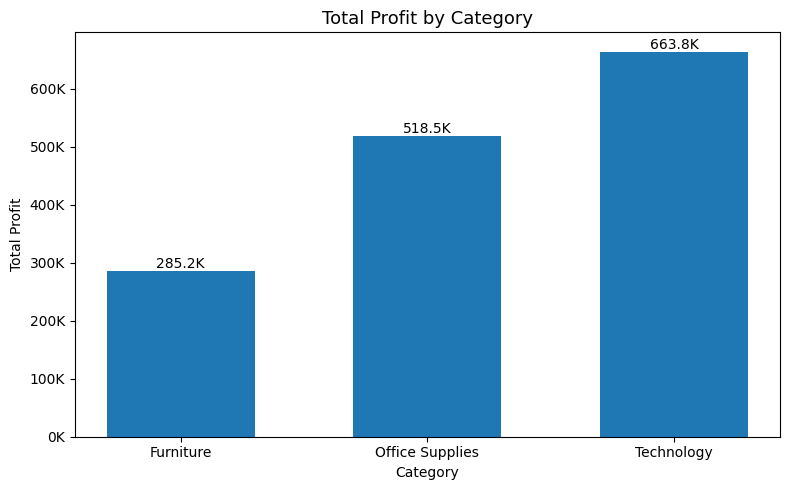

In [85]:
plt.figure(figsize=(8, 5))

plt.bar(
    category_perf["Category"],
    category_perf["Profit"],
    width=0.6
)

plt.title("Total Profit by Category", fontsize=13)
plt.xlabel("Category")
plt.ylabel("Total Profit")

ax = plt.gca()
ax.yaxis.set_major_formatter(lambda y, _: f"{int(y/1000)}K")

for i, value in enumerate(category_perf["Profit"]):
    plt.text(
        i,
        value,
        f"{value/1000:.1f}K",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


#### 4.4.2 Profit Margin by Category

In [89]:
category_perf["Profit_Margin"] = (
    category_perf["Profit"] / category_perf["Sales"]
)

category_perf

,Category,Sales,Profit,Orders,Quantity,Profit_Margin,Profit Margin
0,Furniture,4.110874e+06,285204.72380,8195,34954,0.069378,0.069378
1,Office Supplies,3.787070e+06,518473.83430,19003,108182,0.136906,0.136906
2,Technology,4.744557e+06,663778.73318,8354,35176,0.139903,0.139903


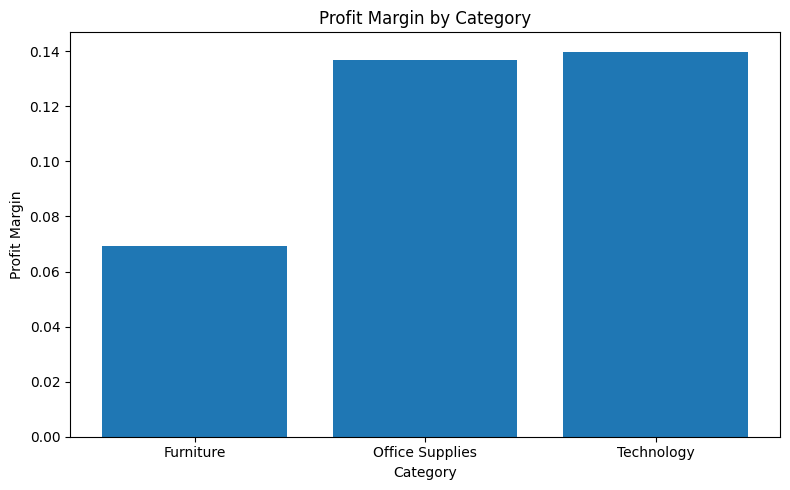

In [90]:
plt.figure(figsize=(8, 5))
plt.bar(category_perf["Category"], category_perf["Profit_Margin"])
plt.title("Profit Margin by Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin")
plt.tight_layout()
plt.show()

#### 4.4.3 Sales & Profit by Sub-Category

In [91]:
subcat_perf = (
    df.groupby(["Category", "Sub-Category"])
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum"),
          Quantity=("Quantity", "sum")
      )
      .reset_index()
)

subcat_perf.head()

,Category,Sub-Category,Sales,Profit,Quantity
0,Furniture,Bookcases,1.466572e+06,161924.4195,8310
1,Furniture,Chairs,1.501682e+06,140396.2675,12336
2,Furniture,Furnishings,3.855783e+05,46967.4255,11225
3,Furniture,Tables,7.570419e+05,-64083.3887,3083
4,Office Supplies,Appliances,1.011064e+06,141680.5894,6078


##### Top 10 Sub-Categories by Sales

In [96]:
top10_sales_subcat = subcat_perf.sort_values(
    by="Sales", ascending=False
).head(10)

top10_sales_subcat

,Category,Sub-Category,Sales,Profit,Quantity
16,Technology,Phones,1.706824e+06,216717.00580,11870
14,Technology,Copiers,1.509436e+06,258567.54818,7454
1,Furniture,Chairs,1.501682e+06,140396.26750,12336
0,Furniture,Bookcases,1.466572e+06,161924.41950,8310
11,Office Supplies,Storage,1.127086e+06,108461.48980,16917
4,Office Supplies,Appliances,1.011064e+06,141680.58940,6078
15,Technology,Machines,7.790601e+05,58867.87300,4906
3,Furniture,Tables,7.570419e+05,-64083.38870,3083
13,Technology,Accessories,7.492370e+05,129626.30620,10946
6,Office Supplies,Binders,4.619115e+05,72449.84600,21429


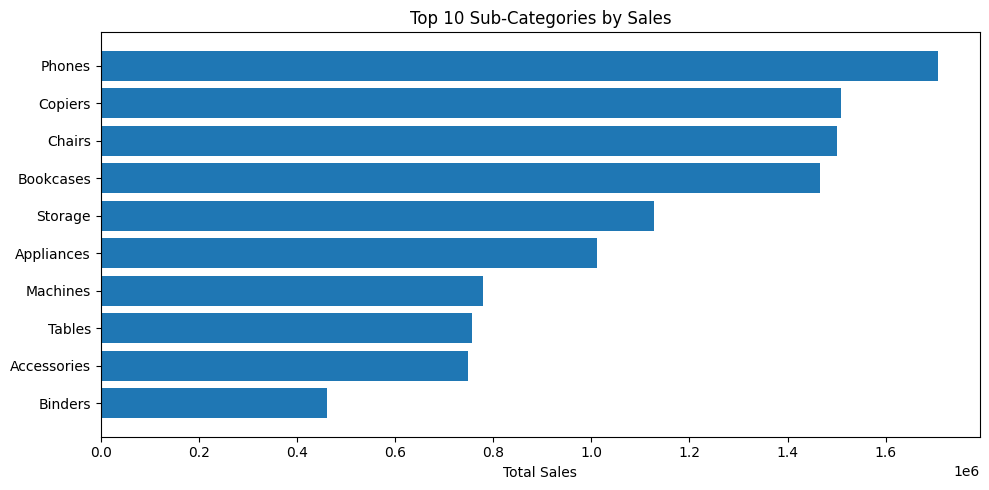

In [97]:
plt.figure(figsize=(10, 5))
plt.barh(
    top10_sales_subcat["Sub-Category"],
    top10_sales_subcat["Sales"]
)
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##### Top 10 Sub-Categories by Profit (or Loss)

In [106]:
top10_profit_subcat = subcat_perf.sort_values(
    by="Profit", ascending=True
).head(10)

top10_profit_subcat

,Category,Sub-Category,Sales,Profit,Quantity
3,Furniture,Tables,757041.9244,-64083.3887,3083
8,Office Supplies,Fasteners,83242.3159,11525.4241,8390
9,Office Supplies,Labels,73404.0300,15010.5120,9322
12,Office Supplies,Supplies,243074.2206,22583.2631,8543
7,Office Supplies,Envelopes,170904.3016,29601.1163,8380
2,Furniture,Furnishings,385578.2559,46967.4255,11225
5,Office Supplies,Art,372091.9659,57953.9109,16301
15,Technology,Machines,779060.0671,58867.8730,4906
10,Office Supplies,Paper,244291.7194,59207.6827,12822
6,Office Supplies,Binders,461911.5057,72449.8460,21429


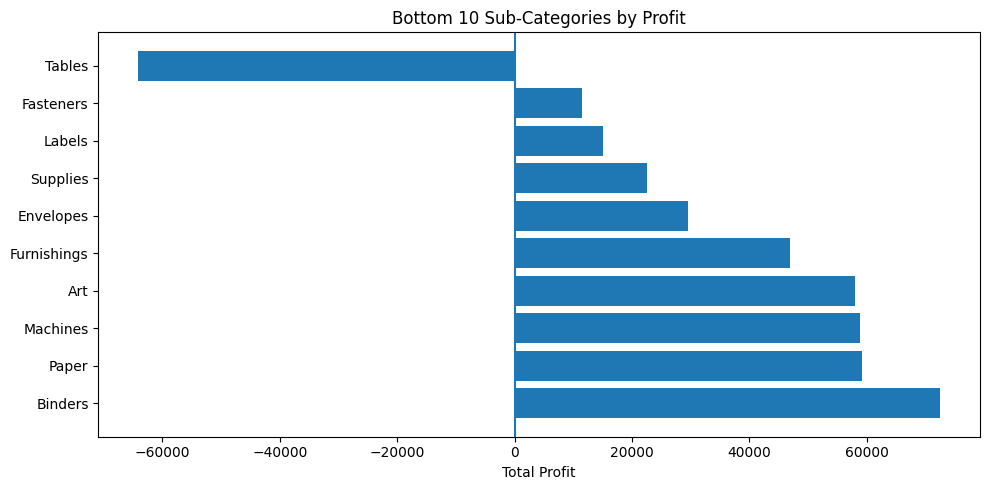

In [107]:
plt.figure(figsize=(10, 5))
plt.barh(
    top10_profit_subcat["Sub-Category"],
    top10_profit_subcat["Profit"]
)
plt.title("Bottom 10 Sub-Categories by Profit")
plt.xlabel("Total Profit")
plt.axvline(0)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### 4.4.4 Low-Margin High-Volume Products

In [108]:
subcat_perf["Profit_Margin"] = (
    subcat_perf["Profit"] / subcat_perf["Sales"]
)

low_margin_high_volume = subcat_perf[
    (subcat_perf["Profit_Margin"] < 0.05) &
    (subcat_perf["Sales"] > subcat_perf["Sales"].median())
]

low_margin_high_volume.sort_values(
    by="Sales", ascending=False
).head(10)

,Category,Sub-Category,Sales,Profit,Quantity,Profit_Margin
3,Furniture,Tables,757041.9244,-64083.3887,3083,-0.08465


#### 4.4.5 Discount vs Profit Relationship

In [112]:
discount_profit = (
    df.groupby("Discount")
      .agg(
          Sales=("Sales", "sum"),
          Profit=("Profit", "sum")
      )
      .reset_index()
)

discount_profit_display = discount_profit.copy()
discount_profit_display["Sales (K)"] = (discount_profit_display["Sales"] / 1000).round(2)
discount_profit_display["Profit (K)"] = (discount_profit_display["Profit"] / 1000).round(2)
discount_profit_display[["Discount", "Sales (K)", "Profit (K)"]]

,Discount,Sales (K),Profit (K)
0,0.000,6992.41,1770.70
1,0.002,261.40,57.98
2,0.070,121.62,21.15
3,0.100,1579.61,259.06
4,0.150,306.03,27.38
5,0.170,247.40,28.16
6,0.200,1203.83,117.72
7,0.202,16.22,-0.60
8,0.250,88.06,0.80
9,0.270,89.35,-1.68


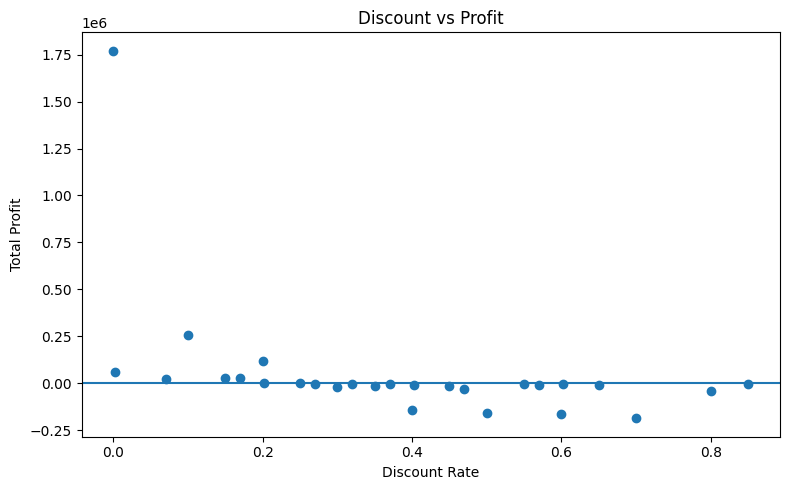

In [114]:
plt.figure(figsize=(8, 5))
plt.scatter(
    discount_profit["Discount"],
    discount_profit["Profit"]
)
plt.title("Discount vs Profit")
plt.xlabel("Discount Rate")
plt.ylabel("Total Profit")
plt.axhline(0)
plt.tight_layout()
plt.show()

### 4.5 Customer & Segment Analysis

#### 4.5.1 Sales & Profit by Customer Segment

In [115]:
segment_perf = (
    df.groupby("Segment")
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("Order ID", "nunique"),
        Quantity=("Quantity", "sum")
    )
    .reset_index()
)

segment_perf

,Segment,Sales,Profit,Orders,Quantity
0,Consumer,6.507949e+06,749239.78206,13104,92157
1,Corporate,3.824698e+06,441208.32866,7673,53565
2,Home Office,2.309855e+06,277009.18056,4687,32590


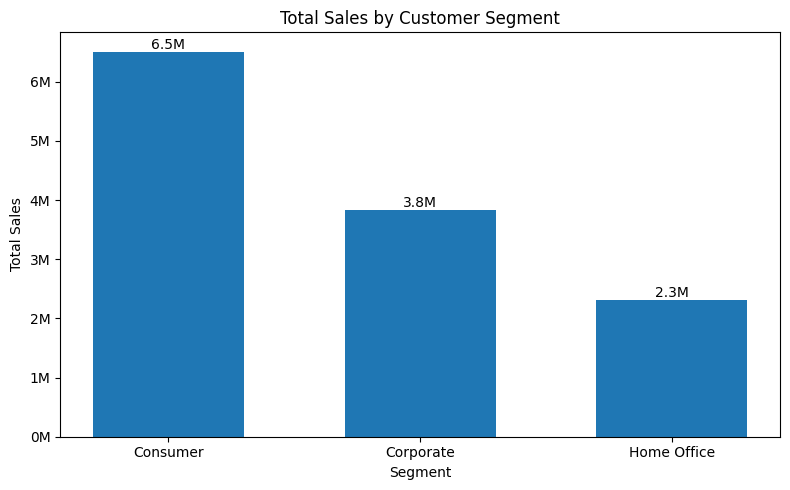

In [118]:
plt.figure(figsize=(8, 5))
plt.bar(segment_perf["Segment"], segment_perf["Sales"], width=0.6)
plt.title("Total Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")

ax = plt.gca()
ax.yaxis.set_major_formatter(lambda y, _: f"{int(y/1_000_000)}M")

for i, v in enumerate(segment_perf["Sales"]):
    plt.text(i, v, f"{v/1_000_000:.1f}M", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 4.5.2 Profit Margin by Customer Segment

In [119]:
segment_perf["Profit_Margin"] = (
    segment_perf["Profit"] / segment_perf["Sales"]
)

segment_perf

,Segment,Sales,Profit,Orders,Quantity,Profit_Margin
0,Consumer,6.507949e+06,749239.78206,13104,92157,0.115127
1,Corporate,3.824698e+06,441208.32866,7673,53565,0.115358
2,Home Office,2.309855e+06,277009.18056,4687,32590,0.119925


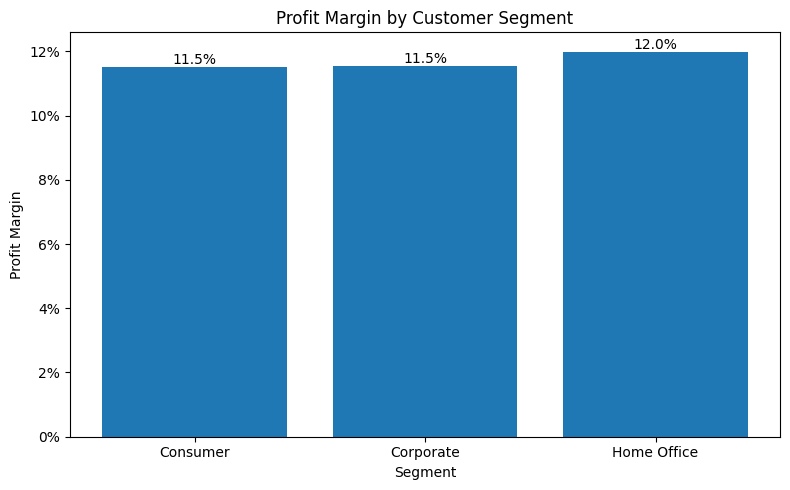

In [120]:
plt.figure(figsize=(8, 5))
plt.bar(segment_perf["Segment"], segment_perf["Profit_Margin"])
plt.title("Profit Margin by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Profit Margin")

ax = plt.gca()
ax.yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")

for i, v in enumerate(segment_perf["Profit_Margin"]):
    plt.text(i, v, f"{v:.1%}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 4.5.3 Top Customers by Sales

In [121]:
customer_perf = (
    df.groupby("Customer Name")
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("Order ID", "nunique")
    )
    .reset_index()
)

top10_customers = customer_perf.sort_values(
    by="Sales", ascending=False
).head(10)

top10_customers

,Customer Name,Sales,Profit,Orders
758,Tom Ashbrook,40488.07080,6311.97910,30
731,Tamara Chand,37457.33300,8672.89890,36
313,Greg Tran,35550.95428,5214.13118,34
157,Christopher Conant,35187.07640,5603.33370,39
687,Sean Miller,35170.93296,-409.70634,28
73,Bart Watters,32310.44650,3595.88590,45
558,Natalie Fritzler,31781.25850,1542.82110,43
290,Fred Hopkins,30400.67452,4609.29112,39
347,Jane Waco,30288.45030,6265.84570,40
335,Hunter Lopez,30243.56658,7816.56778,24


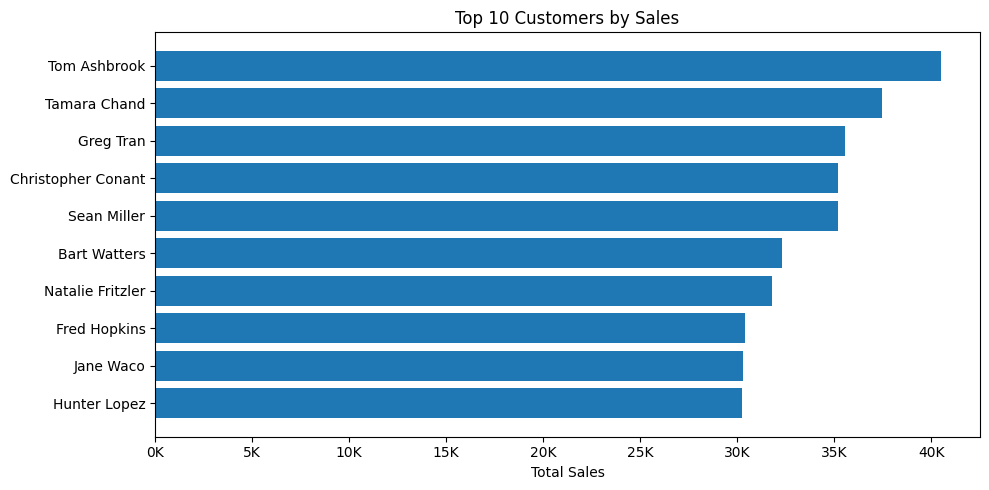

In [125]:
plt.figure(figsize=(10, 5))
plt.barh(
    top10_customers["Customer Name"],
    top10_customers["Sales"]
)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()

ax = plt.gca()
ax.xaxis.set_major_formatter(lambda x, _: f"{int(x/1000)}K")

plt.tight_layout()
plt.show()

#### 4.5.4 High-Revenue but Low-Profit Customers

In [126]:
customer_perf["Profit_Margin"] = (
    customer_perf["Profit"] / customer_perf["Sales"]
)

low_margin_customers = customer_perf[
    (customer_perf["Sales"] > customer_perf["Sales"].median()) &
    (customer_perf["Profit_Margin"] < 0.05)
].sort_values(by="Sales", ascending=False)

low_margin_customers.head(10)

,Customer Name,Sales,Profit,Orders,Profit_Margin
687,Sean Miller,35170.93296,-409.70634,28,-0.011649
558,Natalie Fritzler,31781.25850,1542.82110,43,0.048545
607,Peter Fuller,29875.99966,1063.29136,38,0.035590
793,Zuschuss Carroll,28479.99226,436.93626,38,0.015342
75,Becky Martin,27169.98270,-1096.92540,35,-0.040373
322,Harry Greene,24216.45252,-291.49228,39,-0.012037
544,Mike Pelletier,24214.42680,532.59970,42,0.021995
442,Ken Lonsdale,24129.40450,154.90050,33,0.006420
66,Barry Franz,24079.87166,1115.67056,27,0.046332
210,David Philippe,23729.23412,834.53052,31,0.035169


#### 4.5.5 Segment vs Discount Behavior

In [127]:
segment_discount = (
    df.groupby("Segment")
    .agg(
        Avg_Discount=("Discount", "mean"),
        Total_Sales=("Sales", "sum"),
        Total_Profit=("Profit", "sum")
    )
    .reset_index()
)

segment_discount

,Segment,Avg_Discount,Total_Sales,Total_Profit
0,Consumer,0.143602,6.507949e+06,749239.78206
1,Corporate,0.142931,3.824698e+06,441208.32866
2,Home Office,0.140897,2.309855e+06,277009.18056


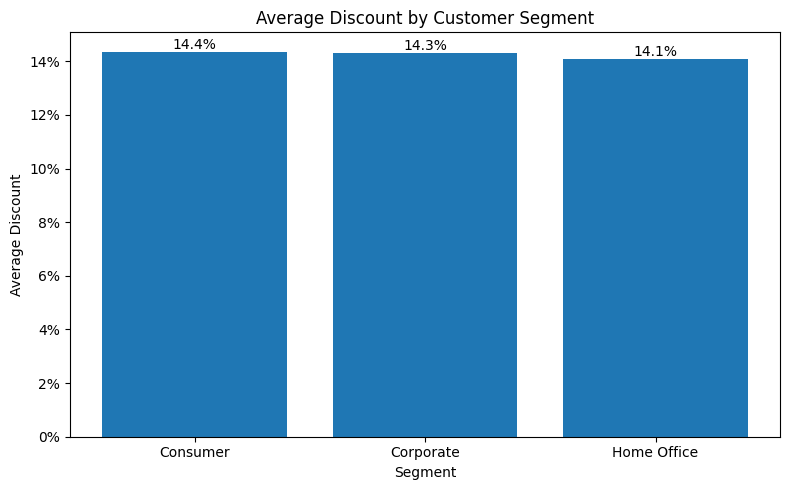

In [128]:
plt.figure(figsize=(8, 5))
plt.bar(
    segment_discount["Segment"],
    segment_discount["Avg_Discount"]
)
plt.title("Average Discount by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Average Discount")

ax = plt.gca()
ax.yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")

for i, v in enumerate(segment_discount["Avg_Discount"]):
    plt.text(i, v, f"{v:.1%}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 4.5.6 Orders vs Profit Scatter by Segment

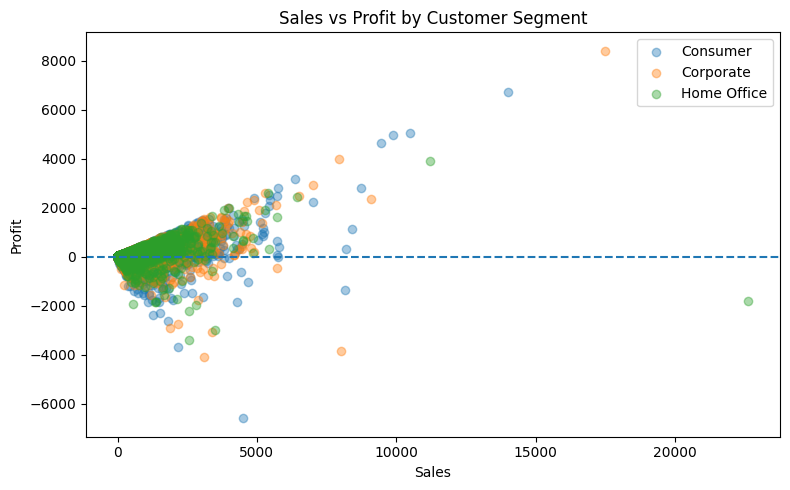

In [129]:
plt.figure(figsize=(8, 5))

for seg in df["Segment"].unique():
    subset = df[df["Segment"] == seg]
    plt.scatter(
        subset["Sales"],
        subset["Profit"],
        label=seg,
        alpha=0.4
    )

plt.axhline(0, linestyle="--")
plt.title("Sales vs Profit by Customer Segment")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()
plt.tight_layout()
plt.show()


### 4.6 Regional / Geographic Analysis

#### 4.6.1 Sales & Profit by Region

In [130]:
region_perf = (
    df.groupby("Region")
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("Order ID", "nunique"),
        Quantity=("Quantity", "sum")
    )
    .reset_index()
)

region_perf

,Region,Sales,Profit,Orders,Quantity
0,Africa,7.837732e+05,88871.63100,2232,10564
1,Canada,6.692817e+04,17817.39000,201,833
2,Caribbean,3.242809e+05,34571.32104,855,6299
3,Central,2.822303e+06,311403.98164,5249,41762
4,Central Asia,7.528266e+05,132480.18700,1026,7715
5,EMEA,8.061613e+05,43897.97100,2462,11517
6,East,6.787812e+05,91522.78000,1401,10618
7,North,1.248166e+06,194597.95252,2356,18021
8,North Asia,8.483098e+05,165578.42100,1150,8851
9,Oceania,1.100185e+06,120089.11200,1744,12838


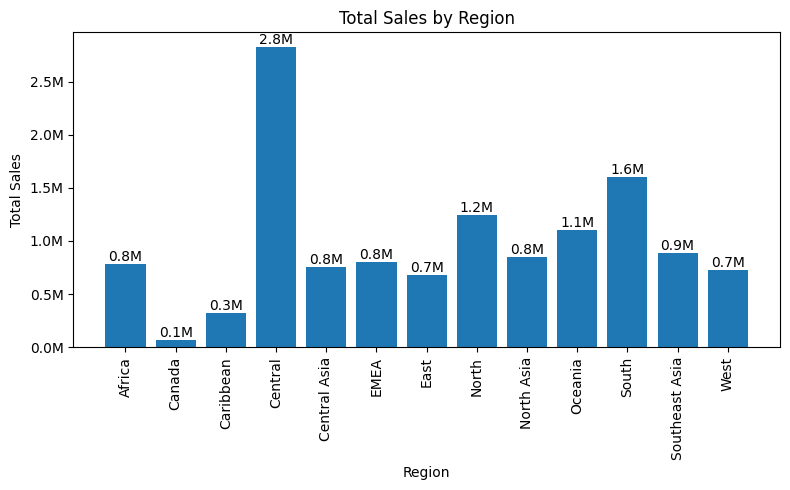

In [134]:
plt.figure(figsize=(8, 5))
plt.bar(region_perf["Region"], region_perf["Sales"])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")

ax = plt.gca()
ax.yaxis.set_major_formatter(lambda y, _: f"{y/1_000_000:.1f}M")

for i, v in enumerate(region_perf["Sales"]):
    plt.text(i, v, f"{v/1_000_000:.1f}M", ha="center", va="bottom")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### 4.6.2 Profit Margin by Region

In [135]:
region_perf["Profit_Margin"] = (
    region_perf["Profit"] / region_perf["Sales"]
)

region_perf

,Region,Sales,Profit,Orders,Quantity,Profit_Margin
0,Africa,7.837732e+05,88871.63100,2232,10564,0.113389
1,Canada,6.692817e+04,17817.39000,201,833,0.266217
2,Caribbean,3.242809e+05,34571.32104,855,6299,0.106609
3,Central,2.822303e+06,311403.98164,5249,41762,0.110337
4,Central Asia,7.528266e+05,132480.18700,1026,7715,0.175977
5,EMEA,8.061613e+05,43897.97100,2462,11517,0.054453
6,East,6.787812e+05,91522.78000,1401,10618,0.134834
7,North,1.248166e+06,194597.95252,2356,18021,0.155907
8,North Asia,8.483098e+05,165578.42100,1150,8851,0.195186
9,Oceania,1.100185e+06,120089.11200,1744,12838,0.109154


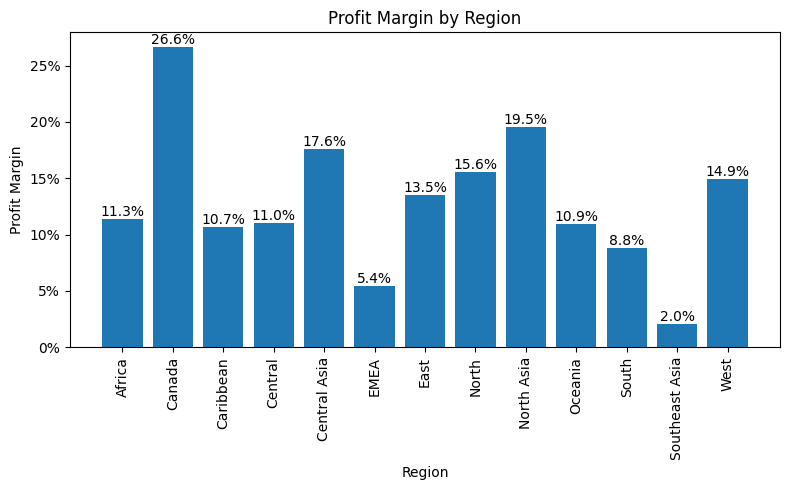

In [137]:
plt.figure(figsize=(8, 5))
plt.bar(region_perf["Region"], region_perf["Profit_Margin"])
plt.title("Profit Margin by Region")
plt.xlabel("Region")
plt.ylabel("Profit Margin")

ax = plt.gca()
ax.yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")

for i, v in enumerate(region_perf["Profit_Margin"]):
    plt.text(i, v, f"{v:.1%}", ha="center", va="bottom")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 4.6.3 Top Countries by Sales

In [138]:
country_perf = (
    df.groupby("Country")
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("Order ID", "nunique")
    )
    .reset_index()
)

top10_countries = country_perf.sort_values(
    by="Sales", ascending=False
).head(10)

top10_countries

,Country,Sales,Profit,Orders
139,United States,2.297201e+06,286397.02170,5009
6,Australia,9.252359e+05,103907.43300,1420
44,France,8.589311e+05,109029.00300,1222
26,China,7.005620e+05,150683.08500,925
47,Germany,6.288400e+05,107322.82050,907
81,Mexico,6.225906e+05,102818.09752,1329
57,India,5.896501e+05,129071.83500,785
138,United Kingdom,5.285763e+05,111900.15000,775
58,Indonesia,4.048875e+05,15608.67790,698
17,Brazil,3.611064e+05,30090.49896,784


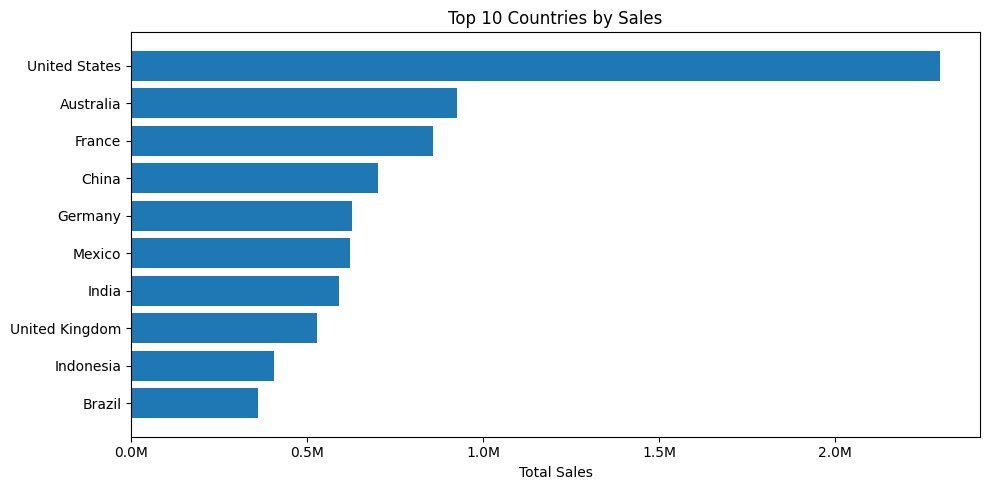

In [139]:
plt.figure(figsize=(10, 5))
plt.barh(
    top10_countries["Country"],
    top10_countries["Sales"]
)
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()

ax = plt.gca()
ax.xaxis.set_major_formatter(lambda x, _: f"{x/1_000_000:.1f}M")

plt.tight_layout()
plt.show()

#### 4.6.4 High-Revenue but Low-Profit Regions

In [140]:
low_margin_regions = region_perf[
    (region_perf["Sales"] > region_perf["Sales"].median()) &
    (region_perf["Profit_Margin"] < 0.05)
].sort_values(by="Sales", ascending=False)

low_margin_regions

,Region,Sales,Profit,Orders,Quantity,Profit_Margin
11,Southeast Asia,884423.169,17852.329,1517,11822,0.020185


#### 4.6.5 State-Level Analysis (Granular Insight)

In [141]:
state_perf = (
    df.groupby("State")
    .agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum"),
        Orders=("Order ID", "nunique")
    )
    .reset_index()
)

state_perf["Profit_Margin"] = (
    state_perf["Profit"] / state_perf["Sales"]
)

state_perf.head()

,State,Sales,Profit,Orders,Profit_Margin
0,'Ajman,209.988,-332.712,3,-1.584433
1,'Amman,7167.990,1797.990,16,0.250836
2,'Asir,1603.500,310.650,5,0.193732
3,Abia,1064.124,-1475.556,9,-1.386639
4,Abruzzi,6723.750,977.760,10,0.145419


In [143]:
bottom_states = state_perf.sort_values(
    by="Profit"
).head(10)

bottom_states

,State,Sales,Profit,Orders,Profit_Margin
449,Istanbul,31037.46000,-29033.70000,202,-0.935441
548,Lagos,17185.32900,-25922.51100,150,-1.508409
983,Texas,170188.04580,-25729.35630,487,-0.151182
742,Ohio,78258.13600,-16971.37660,236,-0.216864
452,Izmir,15161.91600,-15729.80400,59,-1.037455
777,Pennsylvania,116511.91400,-15559.96030,288,-0.133548
334,Francisco Morazán,48048.90392,-15007.41608,178,-0.312336
767,Panama,41490.18064,-14978.49936,172,-0.361013
809,Punjab,60069.99000,-14665.05000,109,-0.244133
939,Stockholm,21589.74900,-13806.44100,74,-0.639491


#### 4.6.6 Sales vs Profit Scatter by Region

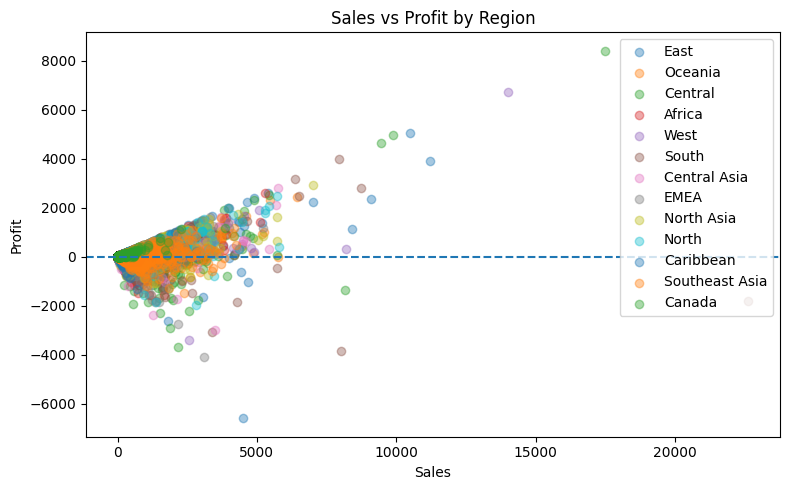

In [144]:
plt.figure(figsize=(8, 5))

for r in df["Region"].unique():
    subset = df[df["Region"] == r]
    plt.scatter(
        subset["Sales"],
        subset["Profit"],
        label=r,
        alpha=0.4
    )

plt.axhline(0, linestyle="--")
plt.title("Sales vs Profit by Region")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()
plt.tight_layout()
plt.show()

### 4.7 Shipping / Delivery Exploration

#### 4.7.1 Shipping KPI by Ship Mode

In [145]:
shipmode_perf = (
    df.groupby("Ship Mode")
      .agg(
          Orders=("Order ID", "nunique"),
          Avg_ShipDays=("ShipDays", "mean"),
          Median_ShipDays=("ShipDays", "median"),
          Avg_ShippingCost=("Shipping Cost", "mean"),
          Total_ShippingCost=("Shipping Cost", "sum"),
          Total_Sales=("Sales", "sum"),
          Total_Profit=("Profit", "sum")
      )
      .reset_index()
)

shipmode_perf["Profit_Margin"] = shipmode_perf["Total_Profit"] / shipmode_perf["Total_Sales"]
shipmode_perf.sort_values("Total_Sales", ascending=False)

,Ship Mode,Orders,Avg_ShipDays,Median_ShipDays,Avg_ShippingCost,Total_ShippingCost,Total_Sales,Total_Profit,Profit_Margin
3,Standard Class,15154,4.998018,5.0,19.971755,614630.76,7.578652e+06,890596.02120,0.117514
2,Second Class,5119,3.230187,3.0,30.469747,314112.62,2.565672e+06,292583.52708,0.114038
0,First Class,3821,2.181746,2.0,41.053065,308103.25,1.830976e+06,208104.67520,0.113658
1,Same Day,1347,0.037394,0.0,42.937453,115974.06,6.672020e+05,76173.06780,0.114168


#### 4.7.2 Avg ShipDays by Ship Mode

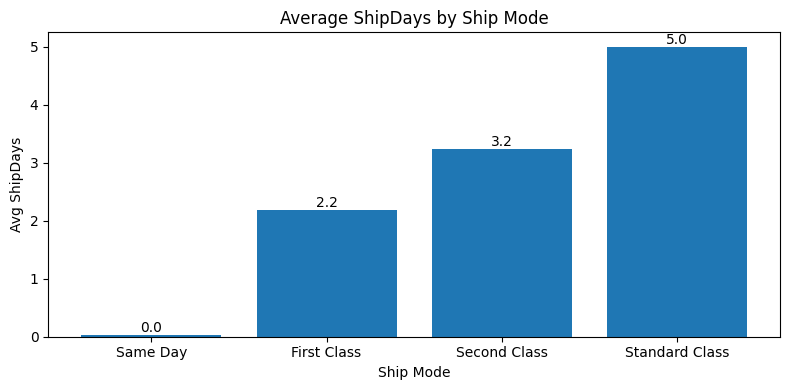

In [146]:
tmp = shipmode_perf.sort_values("Avg_ShipDays")

plt.figure(figsize=(8,4))
plt.bar(tmp["Ship Mode"], tmp["Avg_ShipDays"])
plt.title("Average ShipDays by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Avg ShipDays")

for i, v in enumerate(tmp["Avg_ShipDays"]):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


#### 4.7.3 Profit Margin by Ship Mode

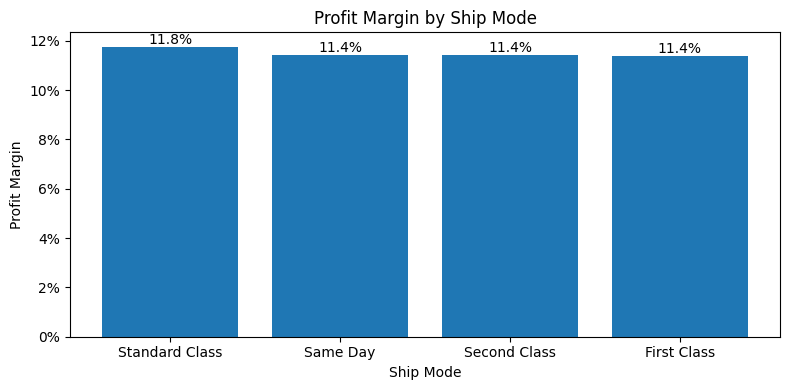

In [147]:
tmp = shipmode_perf.sort_values("Profit_Margin", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(tmp["Ship Mode"], tmp["Profit_Margin"])
plt.title("Profit Margin by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Profit Margin")

ax = plt.gca()
ax.yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")

for i, v in enumerate(tmp["Profit_Margin"]):
    plt.text(i, v, f"{v:.1%}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 4.7.4 High Shipping Cost & Low Profit Orders

In [148]:
# สร้าง ratio ง่าย ๆ: shipping cost ต่อ sales
df["ShipCost_Ratio"] = df["Shipping Cost"] / df["Sales"]

# เลือกออเดอร์ที่ shipping cost ratio สูง (เช่น top 5%) และกำไร <= 0
p95 = df["ShipCost_Ratio"].quantile(0.95)

problem_orders = (
    df[(df["ShipCost_Ratio"] >= p95) & (df["Profit"] <= 0)]
      .loc[:, ["Order ID","Ship Mode","Sales","Profit","Shipping Cost","ShipDays","ShipCost_Ratio"]]
      .sort_values("ShipCost_Ratio", ascending=False)
)

problem_orders.head(10)


,Order ID,Ship Mode,Sales,Profit,Shipping Cost,ShipDays,ShipCost_Ratio
2995,ID-2012-70857,First Class,169.1208,-26.7192,99.72,1,0.589638
39649,CA-2013-157749,Second Class,4.0440,-2.8308,2.33,5,0.576162
13331,IT-2013-5930911,Same Day,43.6050,-4.8450,23.19,0,0.531820
39723,CA-2012-111325,First Class,4.4190,-3.3879,2.31,1,0.522743
451,US-2012-110436,First Class,585.4560,-0.0240,304.53,1,0.520159
307,CA-2013-147368,First Class,695.7000,-27.8280,356.68,3,0.512692
24912,CA-2014-152583,Same Day,16.1920,-8.5008,8.27,0,0.510746
15469,US-2012-129791,First Class,37.7520,-17.6480,18.88,3,0.500106
31449,TU-2013-9330,First Class,9.8400,-9.8400,4.88,2,0.495935
1529,US-2014-169936,First Class,321.7280,-8.1120,159.30,2,0.495139


#### 4.7.5 Region x Ship Mode Summary

In [149]:
region_shipmode = (
    df.groupby(["Region","Ship Mode"])
      .agg(
          Orders=("Order ID","nunique"),
          Avg_ShipDays=("ShipDays","mean"),
          Avg_ShippingCost=("Shipping Cost","mean"),
          Total_Sales=("Sales","sum"),
          Total_Profit=("Profit","sum"),
      )
      .reset_index()
)

region_shipmode["Profit_Margin"] = region_shipmode["Total_Profit"] / region_shipmode["Total_Sales"]
region_shipmode.sort_values("Total_Sales", ascending=False).head(15)


,Region,Ship Mode,Orders,Avg_ShipDays,Avg_ShippingCost,Total_Sales,Total_Profit,Profit_Margin
15,Central,Standard Class,3255,5.037316,20.100950,1.722501e+06,194031.12576,0.112645
43,South,Standard Class,1972,4.975365,18.328668,9.271180e+05,78890.83624,0.085093
31,North,Standard Class,1417,5.059290,21.592789,7.494776e+05,120917.56004,0.161336
39,Oceania,Standard Class,1034,4.973145,26.768511,6.754561e+05,77268.58800,0.114395
47,Southeast Asia,Standard Class,931,4.951220,24.041646,5.609882e+05,15817.36000,0.028196
14,Central,Second Class,1101,3.275276,31.324596,5.607984e+05,61125.10866,0.108997
35,North Asia,Standard Class,696,5.000000,30.637240,5.178819e+05,101894.44500,0.196752
19,Central Asia,Standard Class,621,4.905247,30.773790,4.829865e+05,85839.72300,0.177727
23,EMEA,Standard Class,1488,4.967062,12.946222,4.749636e+05,29168.79900,0.061413
3,Africa,Standard Class,1346,4.971418,13.734566,4.385136e+05,46949.77500,0.107066
